In [56]:
import pandas as pd
import seaborn as sns

from os.path import join
from matplotlib import pyplot as plt

In [66]:
def get_stat(stat_file, stat_name):
    stat_file.seek(0)
    ret = 0
    for line in stat_file.readlines():
        if stat_name in line:
            val_str = line.split()[1]
            if val_str != "nan":
                ret += float(val_str)
    return ret

In [67]:
cache_classes = ["NoCache", "MESITwoLevel"]
generators = ["LinearGenerator", "RandomGenerator"]
memory_classes = ["SingleChannelDDR3_1600", "SingleChannelDDR4_2400", "SingleChannelHBM"]
results_dir = "results"

In [73]:
stats = ["readBW", "avgReadLatency"]

rows = []
for cache in cache_classes:
    for generator in generators:
        for memory in memory_classes:
            file_name = join(results_dir, cache, generator, memory, "stats.txt")
            row = [cache, generator, memory]
            with open(file_name, "r") as stat_file:
                for stat in stats:
                    val = get_stat(stat_file, stat)
                    row.append(val)
            rows.append(row)

data = pd.DataFrame(rows, columns = ["Cache", "Generator", "Memory"] + stats)
data["readBW"] = data["readBW"] / 1073741824
data["avgReadLatency"] = data["avgReadLatency"] / 1000

In [74]:
data.head()

,Cache,Generator,Memory,readBW,avgReadLatency
0,NoCache,LinearGenerator,SingleChannelDDR3_1600,9.178019,236.764906
1,NoCache,LinearGenerator,SingleChannelDDR4_2400,12.917564,322.560948
2,NoCache,LinearGenerator,SingleChannelHBM,13.934048,163.636866
3,NoCache,RandomGenerator,SingleChannelDDR3_1600,11.477635,193.837147
4,NoCache,RandomGenerator,SingleChannelDDR4_2400,16.986957,250.665499


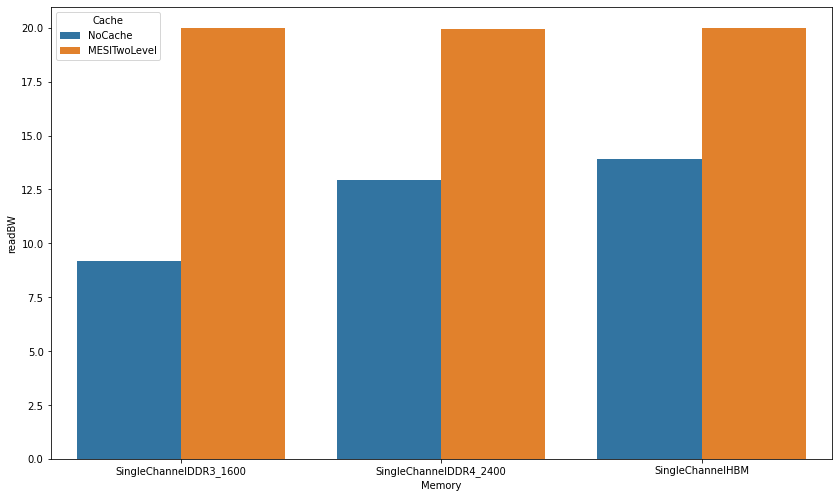

In [77]:
local_data = data[(data["Generator"] == "LinearGenerator")]
plt.figure(figsize = (14, 8.32))
ax = sns.barplot(x = "Memory", y = "readBW", hue = "Cache", data = local_data)
ax.get_figure().savefig("BWLinear.png")

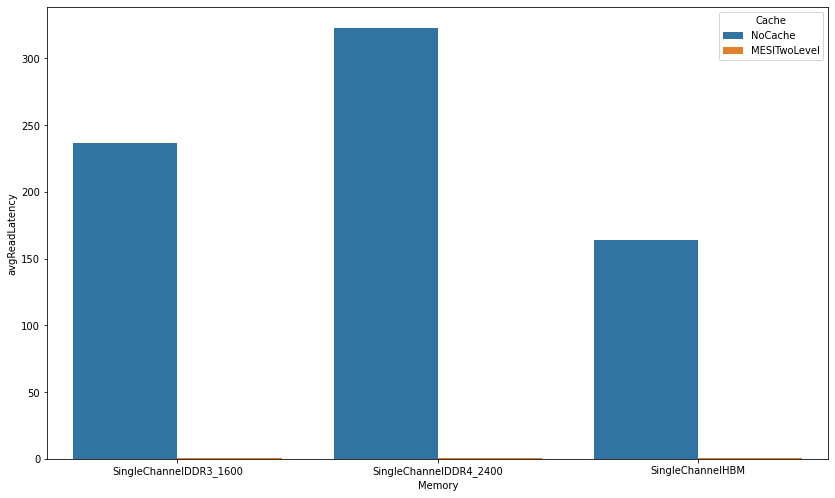

In [78]:
local_data = data[(data["Generator"] == "LinearGenerator")]
plt.figure(figsize = (14, 8.32))
ax = sns.barplot(x = "Memory", y = "avgReadLatency", hue = "Cache", data = local_data)
ax.get_figure().savefig("LatLinear.png")